In [277]:
import pandas as pd
from pycaret.classification import *
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC

In [278]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [279]:
display(train.shape)
display(test.shape)

(13730, 167)

(4570, 43)

In [280]:
display(train.head())
display(test.head())

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,...,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,...,80.0,720.0,E,E,E,B,B,B,D,A


In [281]:
train['IN_TREINEIRO'].value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

In [282]:
test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [283]:
nan_count = train.isnull().sum().sort_values(ascending=False)/train.shape[0]
drop_list1 = list(nan_count[nan_count > 0.5].index)
drop_list1

['CO_UF_ENTIDADE_CERTIFICACAO',
 'NO_ENTIDADE_CERTIFICACAO',
 'SG_UF_ENTIDADE_CERTIFICACAO',
 'Q041',
 'TP_SIT_FUNC_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'CO_UF_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_ESC',
 'CO_ESCOLA',
 'TP_ENSINO',
 'SG_UF_ESC',
 'Q033',
 'Q032',
 'Q031',
 'Q028',
 'Q030',
 'Q029',
 'Q027']

In [284]:
train.drop(columns=drop_list1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 147 entries, Unnamed: 0 to Q050
dtypes: float64(14), int64(79), object(54)
memory usage: 15.4+ MB


In [285]:
drop_list2 = list(set(train.columns) - set(test.columns) - {'IN_TREINEIRO'})
train.drop(columns=drop_list2, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NU_INSCRICAO       13730 non-null  object 
 1   CO_UF_RESIDENCIA   13730 non-null  int64  
 2   SG_UF_RESIDENCIA   13730 non-null  object 
 3   NU_IDADE           13730 non-null  int64  
 4   TP_SEXO            13730 non-null  object 
 5   TP_COR_RACA        13730 non-null  int64  
 6   TP_NACIONALIDADE   13730 non-null  int64  
 7   TP_ST_CONCLUSAO    13730 non-null  int64  
 8   TP_ANO_CONCLUIU    13730 non-null  int64  
 9   TP_ESCOLA          13730 non-null  int64  
 10  IN_TREINEIRO       13730 non-null  int64  
 11  IN_BAIXA_VISAO     13730 non-null  int64  
 12  IN_CEGUEIRA        13730 non-null  int64  
 13  IN_SURDEZ          13730 non-null  int64  
 14  IN_DISLEXIA        13730 non-null  int64  
 15  IN_DISCALCULIA     13730 non-null  int64  
 16  IN_SABATISTA       137

In [286]:
drop_list3 = list(set(test) - set(train))
test.drop(columns=drop_list3, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4570 entries, 0 to 4569
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NU_INSCRICAO       4570 non-null   object 
 1   CO_UF_RESIDENCIA   4570 non-null   int64  
 2   SG_UF_RESIDENCIA   4570 non-null   object 
 3   NU_IDADE           4570 non-null   int64  
 4   TP_SEXO            4570 non-null   object 
 5   TP_COR_RACA        4570 non-null   int64  
 6   TP_NACIONALIDADE   4570 non-null   int64  
 7   TP_ST_CONCLUSAO    4570 non-null   int64  
 8   TP_ANO_CONCLUIU    4570 non-null   int64  
 9   TP_ESCOLA          4570 non-null   int64  
 10  IN_BAIXA_VISAO     4570 non-null   int64  
 11  IN_CEGUEIRA        4570 non-null   int64  
 12  IN_SURDEZ          4570 non-null   int64  
 13  IN_DISLEXIA        4570 non-null   int64  
 14  IN_DISCALCULIA     4570 non-null   int64  
 15  IN_SABATISTA       4570 non-null   int64  
 16  IN_GESTANTE        4570 

In [287]:
train.drop(columns=['IN_CEGUEIRA'], inplace=True)
test.drop(columns=['IN_CEGUEIRA'], inplace=True)

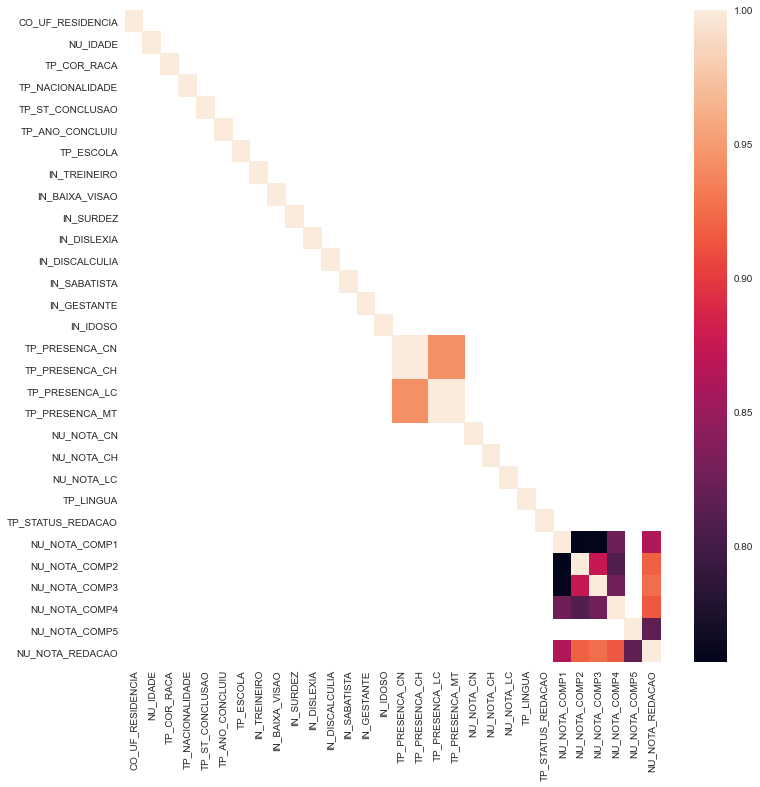

In [288]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr()[train.corr() > 0.7])
plt.show()

In [289]:
drop_list4 = ['TP_STATUS_REDACAO', 'NU_NOTA_COMP1','NU_NOTA_COMP2', 
              'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
              'TP_PRESENCA_CN', 'TP_PRESENCA_CH','TP_PRESENCA_LC', 'TP_PRESENCA_MT']
train.drop(columns=drop_list4, inplace=True)
test.drop(columns=drop_list4, inplace=True)

In [290]:
train.drop(columns=['NU_INSCRICAO'], inplace=True)

In [291]:
drop_list5 = ['CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'TP_NACIONALIDADE', 'IN_SURDEZ', 'IN_DISLEXIA', 
              'IN_DISCALCULIA', 'IN_GESTANTE', 'IN_IDOSO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025',
              'Q026', 'Q047', 'TP_COR_RACA', 'IN_BAIXA_VISAO', 'IN_SABATISTA', 'TP_LINGUA']
train.drop(columns=drop_list5, inplace=True)
test.drop(columns=drop_list5, inplace=True)

In [292]:
cat_var = ['TP_SEXO', 'TP_ST_CONCLUSAO', 'TP_ESCOLA']
num_var = ['NU_IDADE', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

In [293]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_IDADE         13730 non-null  int64  
 1   TP_SEXO          13730 non-null  object 
 2   TP_ST_CONCLUSAO  13730 non-null  int64  
 3   TP_ANO_CONCLUIU  13730 non-null  int64  
 4   TP_ESCOLA        13730 non-null  int64  
 5   IN_TREINEIRO     13730 non-null  int64  
 6   NU_NOTA_CN       10341 non-null  float64
 7   NU_NOTA_CH       10341 non-null  float64
 8   NU_NOTA_LC       10133 non-null  float64
 9   NU_NOTA_REDACAO  10133 non-null  float64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.0+ MB


In [294]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4570 entries, 0 to 4569
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_INSCRICAO     4570 non-null   object 
 1   NU_IDADE         4570 non-null   int64  
 2   TP_SEXO          4570 non-null   object 
 3   TP_ST_CONCLUSAO  4570 non-null   int64  
 4   TP_ANO_CONCLUIU  4570 non-null   int64  
 5   TP_ESCOLA        4570 non-null   int64  
 6   NU_NOTA_CN       3458 non-null   float64
 7   NU_NOTA_CH       3458 non-null   float64
 8   NU_NOTA_LC       3400 non-null   float64
 9   NU_NOTA_REDACAO  3400 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 357.2+ KB


In [295]:
train['TP_ST_CONCLUSAO'] = train['TP_ST_CONCLUSAO'].astype('str')
train['TP_ESCOLA'] = train['TP_ESCOLA'].astype('str')
test['TP_ST_CONCLUSAO'] = test['TP_ST_CONCLUSAO'].astype('str')
test['TP_ESCOLA'] = test['TP_ESCOLA'].astype('str')

In [296]:
train['IN_TREINEIRO'].value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

In [297]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [298]:
X_resampled, y_resampled = SMOTENC([train.dtypes==object]).fit_resample(train.drop(columns=['IN_TREINEIRO']), train['IN_TREINEIRO'])

In [299]:
y_resampled.value_counts()

1    11947
0    11947
Name: IN_TREINEIRO, dtype: int64

In [301]:
final_data = pd.concat([X_resampled, y_resampled], axis=1).reset_index(drop=True)
final_data.head()

,NU_IDADE,TP_SEXO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,IN_TREINEIRO
0,24,M,1,4,1,436.3,495.4,581.2,520.0,0
1,17,F,2,0,2,474.5,544.1,599.0,580.0,0
2,21,F,3,0,1,0.0,0.0,0.0,0.0,0
3,25,F,1,9,1,0.0,0.0,0.0,0.0,0
4,28,M,1,4,1,0.0,0.0,0.0,0.0,0


In [303]:
final_data.shape

(23894, 10)

In [304]:
# 3. Foi considerado treineiro o inscrito que tinha menos de 18 anos no primeiro dia de realização do exame (05/11/2016) e que não havia concluído o ensino médio e não o concluiria em 2016
ml_setup = setup(data=final_data, target='IN_TREINEIRO', train_size=0.8,
                 categorical_features = cat_var, ordinal_features = {'TP_ST_CONCLUSAO' : ['1', '2', '3', '4']},
                 numeric_features=num_var, normalize = True)


Setup Succesfully Completed!


,Description,Value
0,session_id,5287
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(23894, 10)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,4
7,Ordinal Features,True
8,High Cardinality Features,False
9,High Cardinality Method,None


In [306]:
compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Gradient Boosting Classifier,0.996700,1.000000,0.997400,0.996000,0.996700,0.993400
1,CatBoost Classifier,0.996700,1.000000,0.997900,0.995500,0.996700,0.993400
2,Random Forest Classifier,0.996600,0.999700,0.997800,0.995400,0.996600,0.993200
3,Extreme Gradient Boosting,0.996600,1.000000,0.997300,0.995900,0.996600,0.993200
4,Light Gradient Boosting Machine,0.996400,1.000000,0.997900,0.995000,0.996400,0.992900
5,Ada Boost Classifier,0.996300,1.000000,0.997700,0.994900,0.996300,0.992600
6,Decision Tree Classifier,0.995600,0.997600,0.998100,0.993100,0.995600,0.991200
7,Extra Trees Classifier,0.995400,1.000000,0.998600,0.992300,0.995500,0.990900
8,SVM - Linear Kernel,0.993800,0.000000,0.995500,0.992100,0.993800,0.987500
9,K Neighbors Classifier,0.991700,0.997100,0.999900,0.983700,0.991800,0.983400


In [307]:
gbc_model = create_model(estimator='gbc', fold=5, )

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9969,1.0000,0.9974,0.9963,0.9969,0.9937
1,0.9976,1.0000,0.9984,0.9969,0.9976,0.9953
2,0.9969,1.0000,0.9974,0.9963,0.9969,0.9937
3,0.9950,0.9999,0.9969,0.9932,0.9950,0.9901
4,0.9971,1.0000,0.9969,0.9974,0.9971,0.9942
Mean,0.9967,1.0000,0.9974,0.9960,0.9967,0.9934
SD,0.0009,0.0000,0.0006,0.0015,0.0009,0.0018


In [308]:
predict_model(gbc_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Gradient Boosting Classifier,0.9977,1.0,0.9983,0.9971,0.9977,0.9954


,NU_IDADE,TP_ST_CONCLUSAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,TP_SEXO_F,TP_ANO_CONCLUIU_0,TP_ANO_CONCLUIU_1,TP_ANO_CONCLUIU_10,...,TP_ANO_CONCLUIU_7,TP_ANO_CONCLUIU_8,TP_ANO_CONCLUIU_9,TP_ESCOLA_1,TP_ESCOLA_2,TP_ESCOLA_3,TP_ESCOLA_4,IN_TREINEIRO,Label,Score
0,-0.694028,0.778229,0.136473,-0.171897,0.518552,0.115329,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.9997
1,-0.528482,0.778229,0.240615,0.502791,0.335244,0.511780,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.9997
2,0.133704,-0.334311,0.436474,0.367630,0.292890,-0.041673,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0001
3,-0.197389,-0.334311,0.296061,0.546296,0.653301,0.272331,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0005
4,0.961435,-1.446852,-1.894471,-1.901974,-1.821582,-1.611692,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,0.299250,1.890769,0.283939,0.501403,0.461323,0.429333,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.0002
4775,-0.694028,0.778229,-1.894471,-1.901974,-1.821582,-1.611692,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.9998
4776,-0.362935,-0.334311,0.064230,0.078771,0.137134,0.350832,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0002
4777,-0.528482,0.778229,0.489954,0.517728,0.757513,0.456718,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.9997


In [309]:
tuned_gbc = tune_model('gbc', fold=5, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9974,0.9995,0.9984,0.9963,0.9974,0.9948
1,0.9974,1.0000,0.9990,0.9958,0.9974,0.9948
2,0.9048,0.9046,0.8933,0.9143,0.9037,0.8096
3,0.9940,0.9999,0.9974,0.9906,0.9940,0.9880
4,0.8977,0.8943,0.8441,0.9455,0.8920,0.7955
Mean,0.9583,0.9597,0.9464,0.9685,0.9569,0.9165
SD,0.0466,0.0493,0.0653,0.0331,0.0484,0.0932


In [310]:
predict_model(tuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Gradient Boosting Classifier,0.9104,0.9049,0.8518,0.9649,0.9048,0.8209


,NU_IDADE,TP_ST_CONCLUSAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,TP_SEXO_F,TP_ANO_CONCLUIU_0,TP_ANO_CONCLUIU_1,TP_ANO_CONCLUIU_10,...,TP_ANO_CONCLUIU_7,TP_ANO_CONCLUIU_8,TP_ANO_CONCLUIU_9,TP_ESCOLA_1,TP_ESCOLA_2,TP_ESCOLA_3,TP_ESCOLA_4,IN_TREINEIRO,Label,Score
0,-0.694028,0.778229,0.136473,-0.171897,0.518552,0.115329,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1.0
1,-0.528482,0.778229,0.240615,0.502791,0.335244,0.511780,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1.0
2,0.133704,-0.334311,0.436474,0.367630,0.292890,-0.041673,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0
3,-0.197389,-0.334311,0.296061,0.546296,0.653301,0.272331,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0
4,0.961435,-1.446852,-1.894471,-1.901974,-1.821582,-1.611692,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,0.299250,1.890769,0.283939,0.501403,0.461323,0.429333,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,1.0
4775,-0.694028,0.778229,-1.894471,-1.901974,-1.821582,-1.611692,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1.0
4776,-0.362935,-0.334311,0.064230,0.078771,0.137134,0.350832,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0
4777,-0.528482,0.778229,0.489954,0.517728,0.757513,0.456718,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1.0


In [311]:
evaluate_model(gbc_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [313]:
final_model = finalize_model(gbc_model)

In [315]:
save_model(final_model, 'gradient_boosting_model')

Transformation Pipeline and Model Succesfully Saved


In [316]:
loaded_dt_model = load_model('gradient_boosting_model')
print(loaded_dt_model)

Transformation Pipeline and Model Sucessfully Loaded
[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['TP_SEXO',
                                                            'TP_ST_CONCLUSAO',
                                                            'TP_ESCOLA'],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=['NU_IDADE',
                                                          'NU_NOTA_CN',
                                                          'NU_NOTA_CH',
                                                          'NU_NOTA_LC',
                                                          'NU_NOTA_REDACAO'],
                                      target='IN_TREINEIRO',
                                      time_features=[])),
                ('imputer',
                 

In [317]:
predictions = predict_model(loaded_dt_model, data=test)

In [318]:
predictions.head()

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,Label,Score
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,19,F,1,3,1,495.3,593.3,0.0,0.0,0,0.0002
1,177f281c68fa032aedbd842a745da68490926cd2,24,M,1,4,1,0.0,0.0,0.0,0.0,0,0.0005
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,16,F,3,0,1,559.1,529.3,0.0,0.0,1,0.9997
3,5c356d810fa57671402502cd0933e5601a2ebf1e,17,F,2,0,2,475.0,557.8,542.0,480.0,0,0.0002
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,19,F,1,1,1,440.5,596.1,594.2,720.0,0,0.0002


In [319]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4570 entries, 0 to 4569
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_INSCRICAO     4570 non-null   object 
 1   NU_IDADE         4570 non-null   int64  
 2   TP_SEXO          4570 non-null   object 
 3   TP_ST_CONCLUSAO  4570 non-null   object 
 4   TP_ANO_CONCLUIU  4570 non-null   int64  
 5   TP_ESCOLA        4570 non-null   object 
 6   NU_NOTA_CN       4570 non-null   float64
 7   NU_NOTA_CH       4570 non-null   float64
 8   NU_NOTA_LC       4570 non-null   float64
 9   NU_NOTA_REDACAO  4570 non-null   float64
 10  Label            4570 non-null   int64  
 11  Score            4570 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 428.6+ KB


In [325]:
answer = predictions[['NU_INSCRICAO', 'Label']].rename(columns={'Label': 'IN_TREINEIRO'})
answer.to_csv('answer.csv', index=False)

In [326]:
pd.read_csv('answer.csv')

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,0
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,0
4567,3f1c3388244df8d6521e983a809292d9f3bca643,0
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,0
